# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ananda Shadrina
- **Email:** ananda.shadrina04@gmail.com
- **ID Dicoding:** anandashadrina

## Menentukan Pertanyaan Bisnis

* Bagaimana performa peminjaman sepeda pada 2011 hingga 2012?
* Situasi dan kondisi seperti apa dengan total peminjaman sepeda tertinggi dalam 2 tahun tersebut?
* Berapa banyak peminjam sepeda yang terdaftar sebagai pelanggan dan tidak?

## Instalasi dan Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Pada tahap ini dataset day.csv dan hour.csv akan diubah kedalam bentuk dataframe menggunakan library pandas

* Day Dataset

In [2]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


* Hour Dataset

In [3]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Pada tahap ini kedua dataframe akan melalui penilaian terkait kesiapan dataset sebelum dilakukan analisis

* Day Dataframe

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dataframe ini tidak memiliki nilai Null dan duplikat, namun pada column 'dteday' ada kesalahan tipe data yang seharusnya 'date' menjadi 'object'

* Hour Dataframe

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dataframe ini tidak memiliki nilai Null dan duplikat, namun pada column 'dteday' ada kesalahan tipe data yang seharusnya 'date' menjadi 'object'

### Cleaning Data

Pada tahap ini, kedua dataframe akan diubah tipe data pada colum 'dteday' menjadi tipe data 'datetime'

* Day Dataframe

In [12]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

* Hour Dataframe

In [14]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [15]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore Data

Pada tahap ini dataframe yang sudah dibersihkan akan dieksplorasi untuk mengenali data lebih lanjut

In [16]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Dapat dilihat pada rangkuman statistik diatas, data peminjaman sepeda sejak 2011 hingga 2012 kita mendapatkan beberapa informasi seperti jumlah peminjam sepeda paling sedikit dalam satu hari adalah 22 orang dan jumlah peminjam sepeda terbanyak dalam satu hari adalah 8714 orang dengan standar deviasinya sebesar 1937.211452.

In [17]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Dapat dilihat pada rangkuman statistik diatas, data peminjaman sepeda sejak 2011 hingga 2012 kita mendapatkan beberapa informasi seperti jumlah peminjam sepeda paling sedikit dalam satu jam adalah 1 orang dan jumlah peminjam sepeda terbanyak dalam satu jam adalah 977 orang dengan standar deviasinya sebesar 181.387599.

In [18]:
hour_df.groupby(by="season").agg({
    "dteday": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

dteday  cnt                            
       nunique  max min        mean         std
season                                         
1          181  801   1  111.114569  119.224010
2          184  957   1  208.344069  188.362473
3          188  977   1  236.016237  197.711630
4          178  967   1  198.868856  182.967972

Berdasarkan output tersebut dapat disimpulkan bahwa pada tahun 2011 hingga 2012, rata rata peminjaman sepeda **tertinggi** ada pada **Musim Gugur** dan **terendah** pada **Musim Semi**

In [19]:
hour_df.groupby(by="weathersit").agg({
    "dteday": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

dteday  cnt                            
           nunique  max min        mean         std
weathersit                                         
1              700  977   1  204.869272  189.487773
2              567  957   1  175.165493  165.431589
3              300  891   1  111.579281  133.781045
4                3  164  23   74.333333   77.925178

Berdasarkan output tersebut pada tahun 2011 hingga 2012, cuaca pada hari dengan rata rata peminjaman sepeda **tertinggi** ada pada cuaca cerah dan agak berawan dan **terendah** pada hari dengan hujan, bersalju, petir, dan badai.

In [20]:
hour_df.groupby(by="hr").agg({
    "dteday": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

dteday  cnt                            
   nunique  max min        mean         std
hr                                         
0      726  283   2   53.898072   42.307910
1      724  168   1   33.375691   33.538727
2      715  132   1   22.869930   26.578642
3      697   79   1   11.727403   13.239190
4      697   28   1    6.352941    4.143818
5      717   66   1   19.889819   13.200765
6      725  213   1   76.044138   55.084348
7      727  596   1  212.064649  161.441936
8      727  839   5  359.011004  235.189285
9      727  426  14  219.309491   93.703458
10     727  539   8  173.668501  102.205413
11     727  663  10  208.143054  127.495536
12     728  776   3  253.315934  145.081134
13     729  760  11  253.661180  148.107657
14     729  750  12  240.949246  147.271574
15     729  750   7  251.233196  144.632541
16     730  783  11  311.983562  148.682618
17     730  976  15  461.452055  232.656611
18     728  977  23  425.510989  224.639304
19     728  743  11  311.523352  161.050359
20     728  567  11  226.030220  119.670164
21     728  584   6  172.314560   89.788893
22     728  502   9  131.335165   69.937782
23     728  256   2   87.831044   50.846889

Waktu yang memiliki rata rata peminjaman sepeda tertinggi adalah pada pukul 5 p.m., 6 p.m., dan 8 p.m. Sedangkan waktu dengan rata rata peminjaman sepeda terendah adalah pada pukul 4 a.m., 3 a.m. dan 2 a.m. Hal ini menunjukkan peminjam sepeda meningkat di sore menjelang malam hari dan menurun pada dini hari.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana performa peminjaman sepeda pada 2011 hingga 2012?

In [21]:
main_df = hour_df.copy()
mapping_yr = {0: '2011', 1: '2012'}
mapping_mnth = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
mapping_season = {1:'Spring', 2: 'Summer', 3:'Fall', 4:'Winter'}
mapping_weathersit = {1:'Clear', 2: 'Cloudy', 3:'Light Snow/Rain', 4:'Heavy Rain/Ice Pallets'}


main_df['yr'] = main_df['yr'].map(mapping_yr)
main_df['mnth'] = main_df['mnth'].map(mapping_mnth)
main_df['weekday'] = main_df['dteday'].dt.day_name()
main_df['season'] = main_df['season'].map(mapping_season)
main_df['weathersit'] = main_df['weathersit'].map(mapping_weathersit)
main_df = main_df[['dteday', 'yr', 'mnth', 'hr', 'weekday', 'season', 'weathersit','cnt', 'registered', 'casual']]

print(main_df)

          dteday    yr      mnth  hr   weekday  season weathersit  cnt  \
0     2011-01-01  2011   January   0  Saturday  Spring      Clear   16   
1     2011-01-01  2011   January   1  Saturday  Spring      Clear   40   
2     2011-01-01  2011   January   2  Saturday  Spring      Clear   32   
3     2011-01-01  2011   January   3  Saturday  Spring      Clear   13   
4     2011-01-01  2011   January   4  Saturday  Spring      Clear    1   
...          ...   ...       ...  ..       ...     ...        ...  ...   
17374 2012-12-31  2012  December  19    Monday  Spring     Cloudy  119   
17375 2012-12-31  2012  December  20    Monday  Spring     Cloudy   89   
17376 2012-12-31  2012  December  21    Monday  Spring      Clear   90   
17377 2012-12-31  2012  December  22    Monday  Spring      Clear   61   
17378 2012-12-31  2012  December  23    Monday  Spring      Clear   49   

       registered  casual  
0              13       3  
1              32       8  
2              27       5  

In [22]:
monthly_rentals = main_df.groupby(['yr', 'mnth'])[['cnt', 'registered', 'casual']].sum().reset_index()

monthly_rentals = monthly_rentals[['yr', 'mnth', 'cnt', 'registered', 'casual']]

print(monthly_rentals)


      yr       mnth     cnt  registered  casual
0   2011      April   94870       72524   22346
1   2011     August  136691      107849   28842
2   2011   December   87323       78875    8448
3   2011   February   48215       41973    6242
4   2011    January   38189       35116    3073
5   2011       July  141341      104889   36452
6   2011       June  143512      112900   30612
7   2011      March   64045       51219   12826
8   2011        May  135821      104771   31050
9   2011   November  102167       86573   15594
10  2011    October  123511       98289   25222
11  2011  September  127418      100873   26545
12  2012      April  174224      135768   38456
13  2012     August  214503      171306   43197
14  2012   December  123713      110468   13245
15  2012   February  103137       94416    8721
16  2012    January   96744       87775    8969
17  2012       July  203607      161902   41705
18  2012       June  202830      159536   43294
19  2012      March  164875      133257 

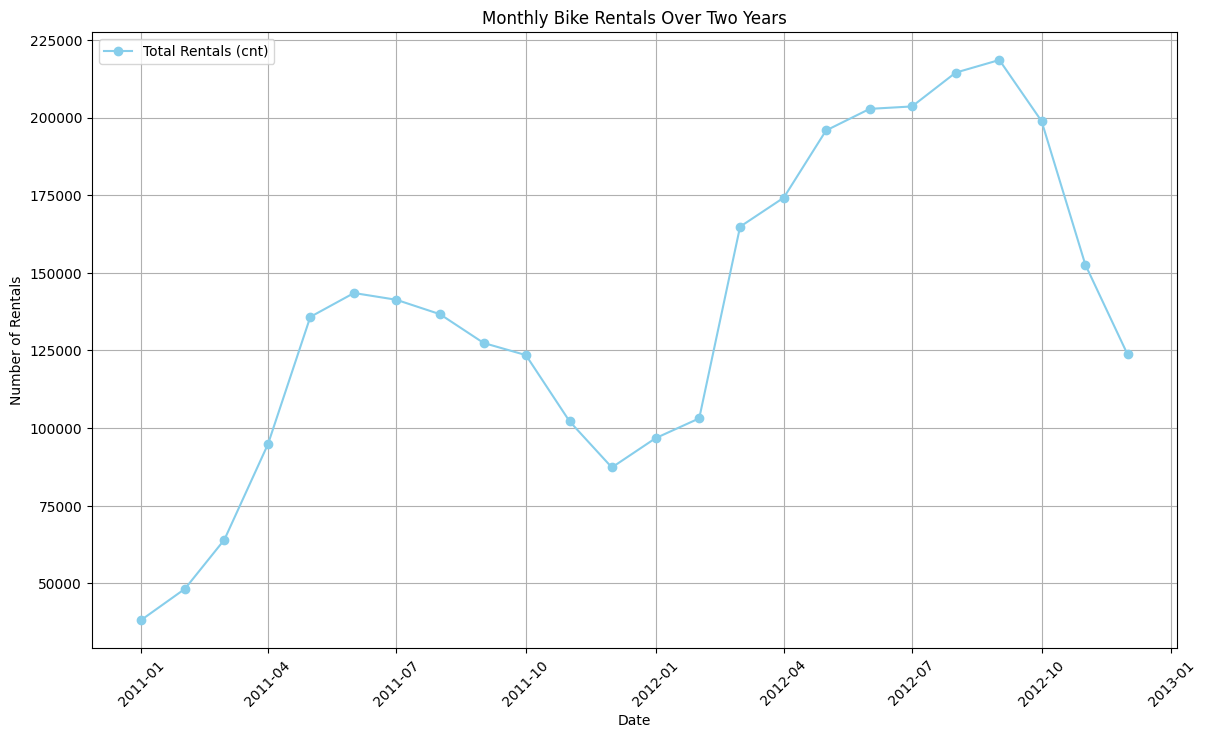

In [23]:
monthly_rentals['date'] = monthly_rentals['yr'] + '-' + monthly_rentals['mnth']
monthly_rentals['date'] = pd.to_datetime(monthly_rentals['date'], format='%Y-%B')
monthly_rentals = monthly_rentals.sort_values('date')

plt.figure(figsize=(14, 8))
plt.plot(monthly_rentals['date'], monthly_rentals['cnt'], marker='o', label='Total Rentals (cnt)', color='skyblue')
plt.title('Monthly Bike Rentals Over Two Years')
plt.xlabel('Date')
plt.ylabel('Number of Rentals')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

Performa peminjaman sepeda selama 2011 ini menunjukkan kuartal pertama terdapat kenaikan yang cukup bagus dan akan meningkat pesat pada kuartal kedua, kemudian pada kuartal ketiga akan ada penurunan jumlah peminjam walaupun tidak pesat namun terus terjadi hingga kuartal 4 bahkan penurunan lebih drastis.

Sedangkan pada tahun 2012, terdapat kenaikan sangat signifikan di akhir kuartal pertama yang terus meningkat hingga kuartal ketiga, namun kembali terjadi penurunan pada kuartal keempat
Secara keseluruhan grafik peminjaman sepeda ini memiliki peningkatan yang cukup baik.

### Pertanyaan 2:

Situasi dan kondisi seperti apa dengan total peminjaman sepeda tertinggi dalam 2 tahun tersebut?


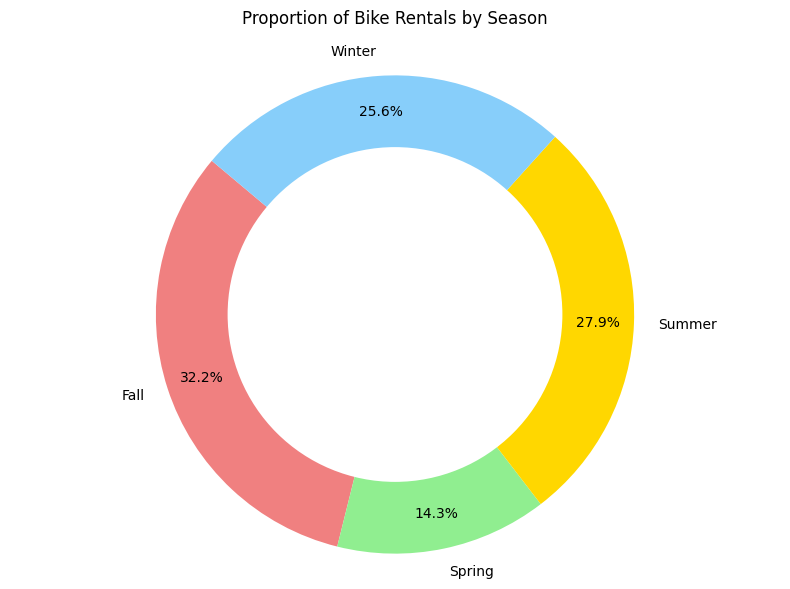

In [24]:
# Musim
seasonal_counts = main_df.groupby('season')['cnt'].sum()
season_colors = {
    'Winter': 'lightskyblue',
    'Spring': 'lightgreen',
    'Summer': 'gold',
    'Fall': 'lightcoral'
}

plt.figure(figsize=(8, 6))

sizes = seasonal_counts.values
labels = seasonal_counts.index
colors = [season_colors[label] for label in labels]

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.title('Proportion of Bike Rentals by Season', pad=20)
plt.tight_layout()
plt.show()

Diagram diatas menunjukkan musim gugur dan musim panas merupakan musim dengan jumlah peminjam sepeda tertinggi

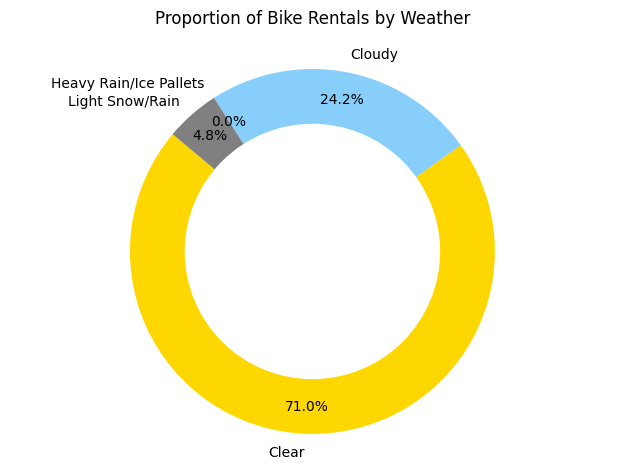

In [25]:
#Cuaca
weather_counts = main_df.groupby('weathersit')['cnt'].sum()
weather_colors = {
    'Clear':'gold', 
    'Cloudy':'lightskyblue', 
    'Light Snow/Rain':'grey', 
    'Heavy Rain/Ice Pallets':'darkblue'
}
sizes = weather_counts.values
labels = weather_counts.index
colors_weather = [weather_colors[label] for label in labels]
plt.pie(sizes, labels=labels, colors=colors_weather, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.title('Proportion of Bike Rentals by Weather', pad=20)
plt.tight_layout()
plt.show()

Diagram diatas menunjukkan lebih dari 70% peminjam sepeda menyukai cuaca cerah atau sedikit berawan

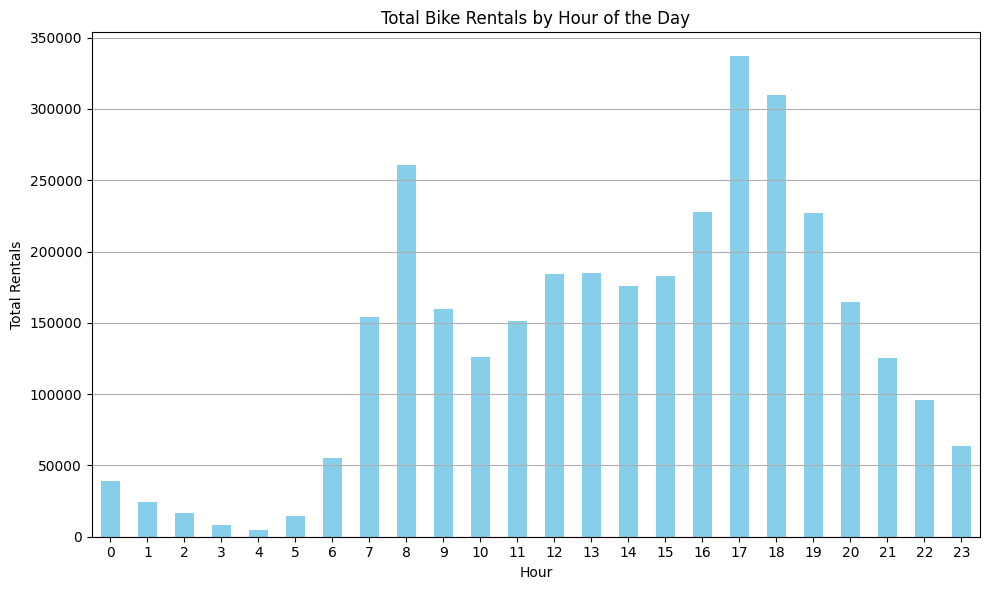

In [26]:
# Waktu
hourly_counts = main_df.groupby('hr')['cnt'].sum()

plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar', color='skyblue')
plt.title('Total Bike Rentals by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Total Rentals')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Pada chart diatas menunjukkan total peminjam sepeda pada pukul 5 p.m. dan 6 p.m., masing masing lebih dari 300.000 peminjam sejak 2011 hingga 2012.

### Analisis Lanjutan Clustering tanpa Machine Learning Algorithm

Pada analisis lanjutan ini, metode yang digunakan adalah clustering. Clustering pada analisis ini merupakan pengelompokkan data berdasarkan pada dua buah feature yaitu 'hr' dan 'weekday' yang kemudian menghitung total 'cnt' dari setiap kombinasi hari dan jam dengan tujuan melihat pola dan tren dari data yang ada dengan visualisasi berupa heatmap.

In [27]:
clustering = main_df.groupby(['weekday', 'hr'])['cnt'].sum().unstack()

print(clustering)


hr           0     1     2     3    4     5      6      7      8      9   ...  \
weekday                                                                   ...   
Friday     5453  2571  1325   673  589  2486   9363  26450  48077  26935  ...   
Monday     3571  1800  1021   496  567  2252   8930  25848  42868  22718  ...   
Saturday   9902  7117  5302  2403  804   854   2205   4826  12020  19613  ...   
Sunday     9775  8053  6286  3239  955   852   1493   3476   8805  16437  ...   
Thursday   4045  1774   934   497  528  2669  11066  31388  50323  24810  ...   
Tuesday    2790  1254   687   382  508  2470  10863  30569  48122  24118  ...   
Wednesday  3594  1595   797   484  477  2678  11212  31614  50786  24807  ...   

hr            14     15     16     17     18     19     20     21     22  \
weekday                                                                    
Friday     23854  26256  34423  51211  43783  31415  22186  17667  15295   
Monday     20041  21046  29583  52249  500

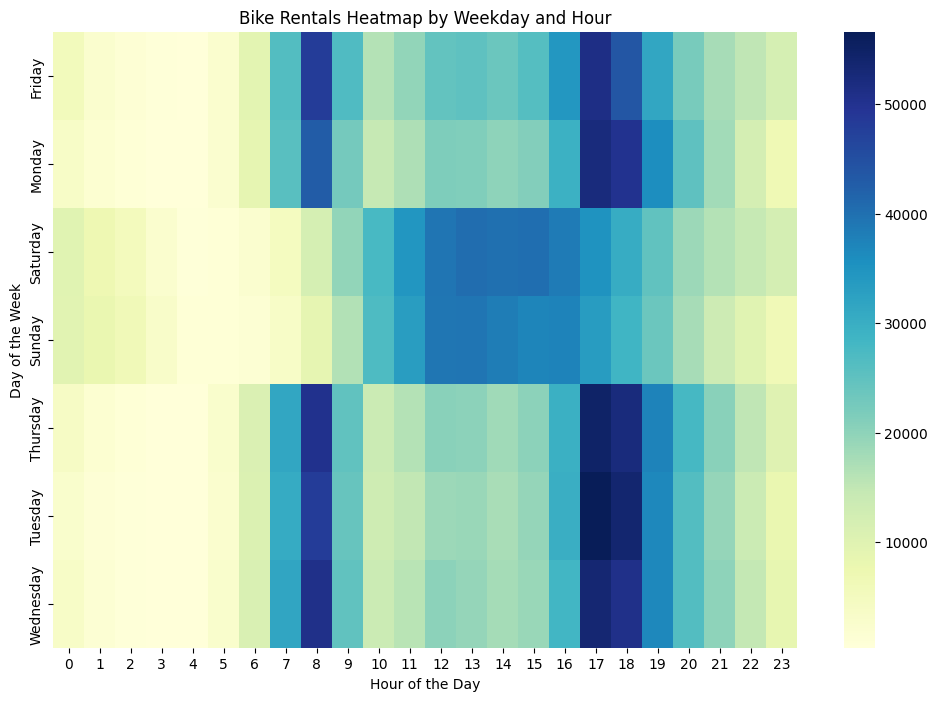

In [28]:
plt.figure(figsize=(12, 8))
sns.heatmap(clustering, cmap="YlGnBu", annot=False, fmt=".0f")
plt.title('Bike Rentals Heatmap by Weekday and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()


Berdasarkan clustering yang ditampilkan pada heatmap diatas, dapat disimpulkan bahwa peminjam sepeda akan meningkat pada pukul 8 a.m. dan pukul 5 p.m. dan 6 p.m. pada hari Senin hingga Jumat, sedangkan untuk hari Sabtu dan Minggu, peminjam sepeda meningkat di siang hari kisaran pukul 12 a.m. hingga 3 p.m.

### Pertanyaan 3:

Berapa banyak peminjam sepeda yang terdaftar sebagai pelanggan dan tidak?

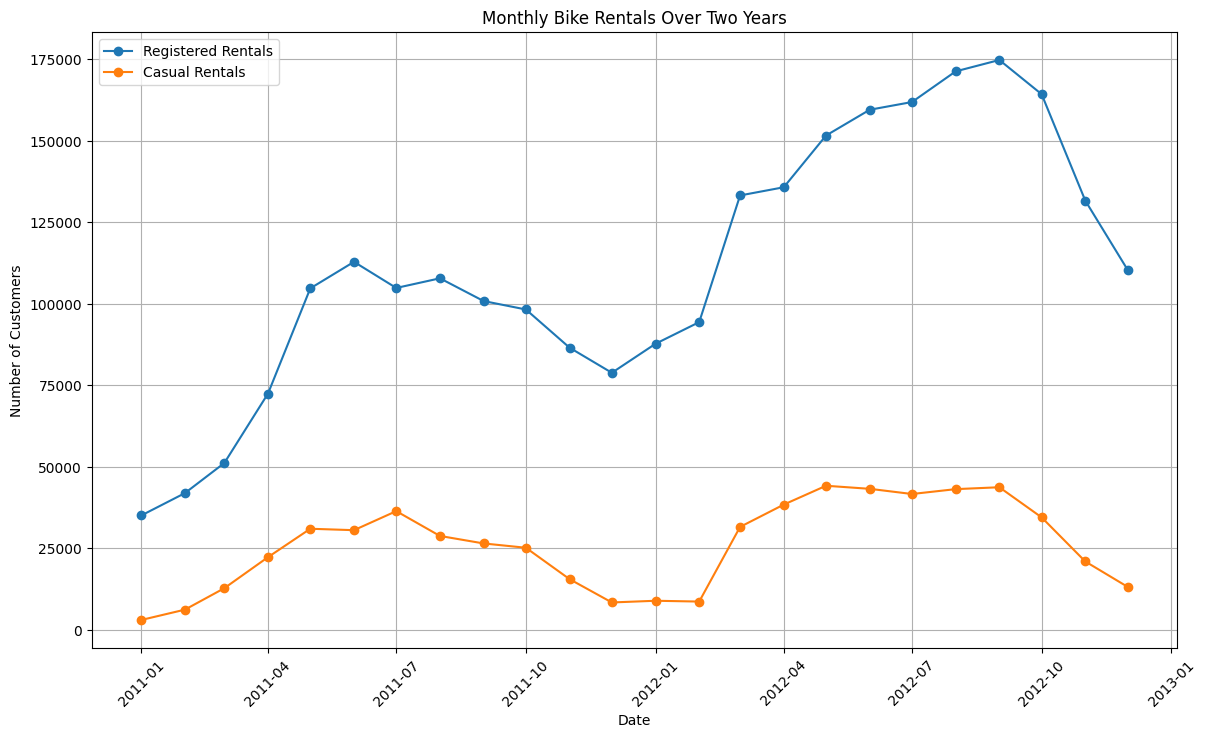

In [29]:
plt.figure(figsize=(14, 8))
plt.plot(monthly_rentals['date'], monthly_rentals['registered'], marker='o', label='Registered Rentals')
plt.plot(monthly_rentals['date'], monthly_rentals['casual'], marker='o', label='Casual Rentals')

plt.title('Monthly Bike Rentals Over Two Years')
plt.xlabel('Date')
plt.ylabel('Number of Customers')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

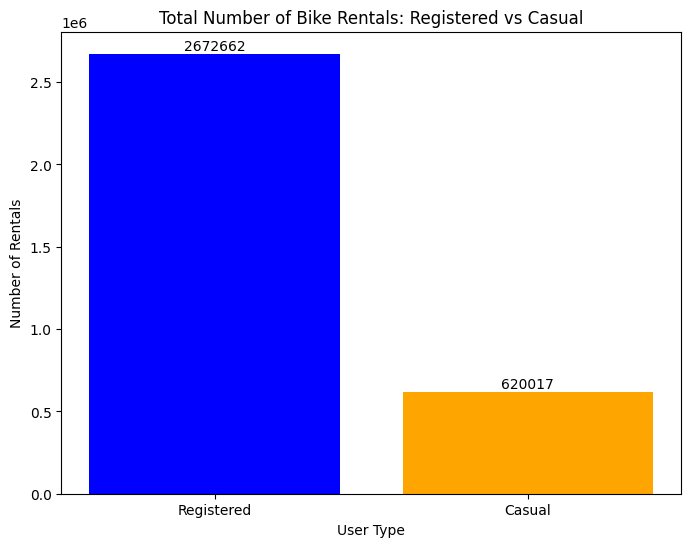

In [30]:
total_registered = main_df['registered'].sum()
total_casual = main_df['casual'].sum()
labels = ['Registered', 'Casual']
values = [total_registered, total_casual]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'orange'])
plt.title('Total Number of Bike Rentals: Registered vs Casual')
plt.xlabel('User Type')
plt.ylabel('Number of Rentals')

for i, value in enumerate(values):
    plt.text(i, value + 1000, str(value), ha='center', va='bottom')

plt.show()

Peminjam sepeda yang terdaftar jauh lebih banyak daripada peminjam casual. Namun peminjam casual memiliki jumlah yang cukup besar yaitu 620017 orang selama 2 tahun tersebut.

## Conclusion

Berdasarkan proses analisis data yang dilakukan menggunakan dataset Bike-Sharing atau Bisnis Peminjaman Sepeda ini dengan beberapa pertanyaan bisnis yang telah disebutkan diawal, dapat disimpulkan sebagai berikut.

- Performa peminjaman sepeda pada tahun 2011 hingga 2012 mengalami peningkatan yang cukup baik dimana peningkatan yang signifikan akan terjadi diantara kuartal 2 hingga kuartal 3 tiap tahunnya dan mengalami penurunan di kuartal akhir tahun.
- Situasi dan kondisi dengan jumlah peminjam sepeda tertinggi adalah sebagai berikut

  *   Musim Gugur memiliki total peminjaman tertinggi dibandingkan 3 musim lainnya.
  *   Cuaca cerah dan sedikit berawan juga merupakan cuaca dengan tingkat peminjaman tertinggi.
  *   Waktu dengan peminjaman sepeda tertinggi berkisar antara pukul 5 hingga 6 sore dan pukul 8 pagi.
  *   Peminjam sepeda juga lebih banyak pada hari Senin hingga Jumat sedangkan untuk hari Sabtu dan Minggu cukup ramai sejak pukul 12 siang hingga 3 sore.

-  Jumlah peminjam sepeda yang sudah terdaftar jauh lebih banyak dibandingkan peminjam biasa. Hal ini menunjukkan pemasaran bisnis ini perlu diperluas untuk menarik perhatian peminjam baru dan tidak hanya pelanggan yang terdaftar saja.




In [31]:
# Menyimpan dataframe 'main_df' dalam bentuk csv untuk menjadi data utama pada pembuatan dashboard

# main_df.to_csv("dashboard/main_data.csv", index=False)